In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('C:/Users/whileduck/Dropbox/python/usa_housing.csv')

In [3]:
pd.options.display.float_format = '{:.10f}'.format

In [4]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
df = data.copy()

In [6]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.4585743168,5.6828613216,7.0091881428,4.0900000000,23086.8005026865,1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.6424548257,6.0028998083,6.7308210191,3.0900000000,40173.0721736448,1505890.9148469500,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.0671786568,5.8658898403,8.5127274304,5.1300000000,36882.1593997046,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.2400462280,7.1882360945,5.5867286648,3.2600000000,34310.2428309071,1260616.8066294468,USS Barnett\nFPO AP 44820
4,59982.1972257080,5.0405545231,7.8393877851,4.2300000000,26354.1094721031,630943.4893385402,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.9441398660,7.8303624436,6.1373562276,3.4600000000,22837.3610347464,1060193.7858846080,USNS Williams\nFPO AP 30153-7653
4996,78491.2754345979,6.9991349873,6.5767626607,4.0200000000,25616.1154890612,1482617.7286220239,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.6868855046,7.2505906148,4.8050809803,2.1300000000,33266.1454896522,1030729.5831522896,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.3312350870,5.5343884162,7.1301438643,5.4400000000,42625.6201558509,1198656.8724076871,USS Wallace\nFPO AE 73316


In [7]:
df = df.drop('Address',axis=1)

In [8]:
df['Avg_room_number'] = df['Avg. Area Number of Rooms'] + df['Avg. Area Number of Bedrooms']
df = df.drop(df[['Avg. Area Number of Bedrooms','Avg. Area Number of Rooms']],axis = 1)



In [9]:
df.columns.tolist()

['Avg. Area Income',
 'Avg. Area House Age',
 'Area Population',
 'Price',
 'Avg_room_number']

In [10]:
df = df[['Avg. Area Income',
 'Avg. Area House Age',
 'Area Population',
 'Avg_room_number','Price']]

<AxesSubplot:>

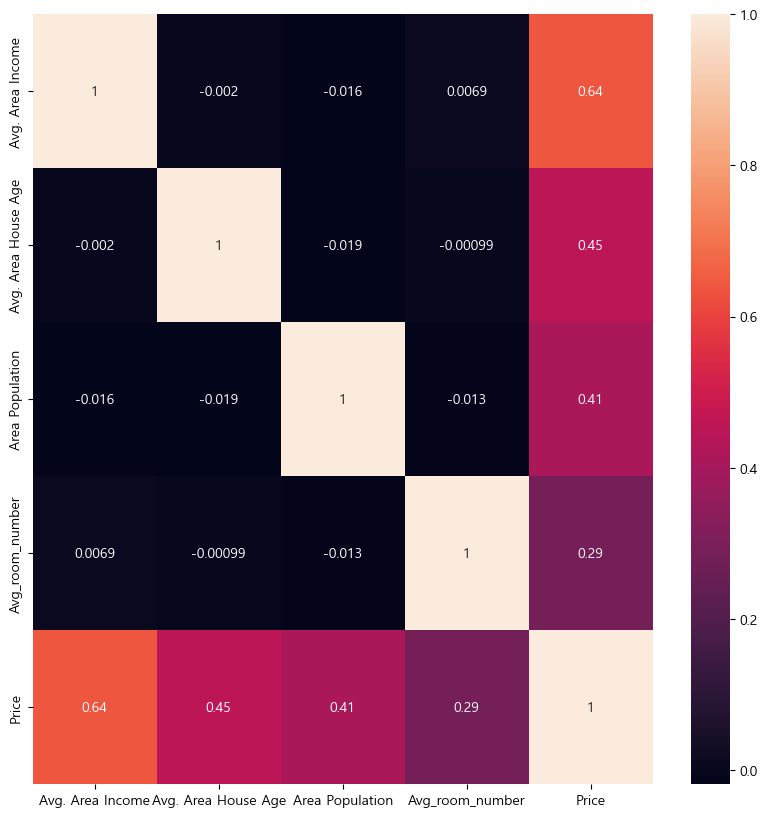

In [11]:
plt.figure(figsize = [10,10])
sns.heatmap(df.corr(),annot = True)

<Figure size 640x480 with 0 Axes>

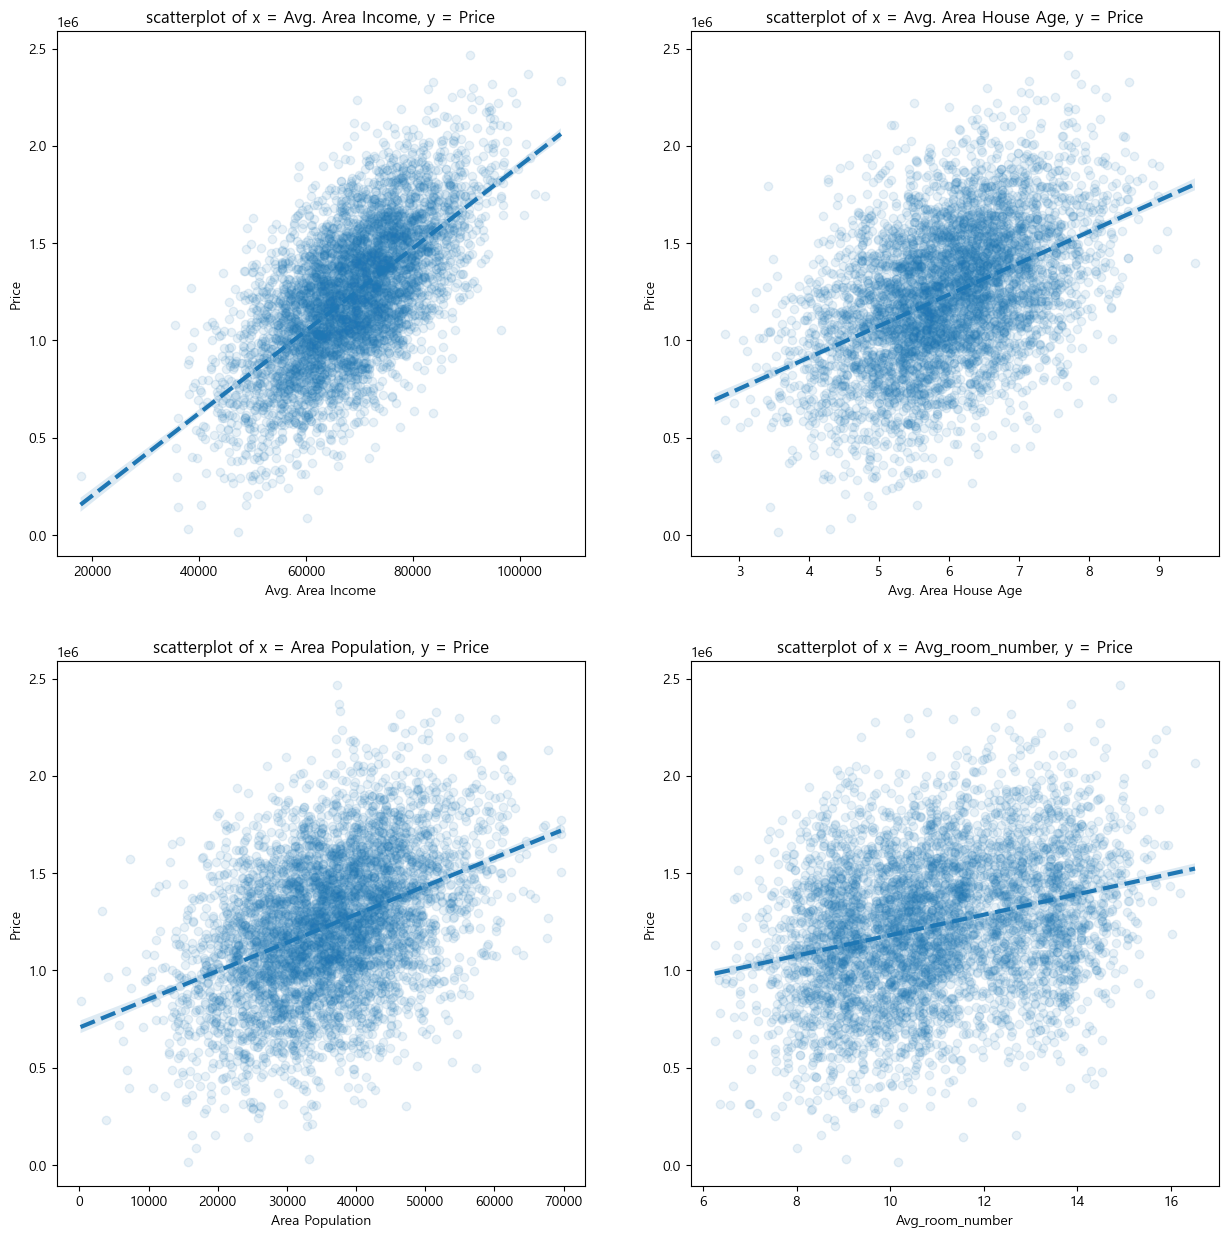

In [12]:
columns = df.columns.tolist()[:-1]
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.5, wspace=0.5, hspace=0.5)
plt.figure(figsize = [15,15])
for i,var in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.regplot(data = df,
                    x = df[f'{var}'],
                    y = df['Price'],
                    line_kws={"lw":3, "ls":"--"},
                    scatter_kws = {'alpha':0.1},
                    )
    plt.title(f'scatterplot of x = {var}, y = Price')

In [13]:
coefi = ['beta0','beta1','beta2','beta3','beta4']
coefi

['beta0', 'beta1', 'beta2', 'beta3', 'beta4']

#### beta 0 (절편) 값이 곱해질 새로운 열 (constant)를 데이터 프레임에 만들어준다

In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Area Population',
       'Avg_room_number', 'Price'],
      dtype='object')

In [15]:
df['constant'] = 1 

In [16]:
df['error'] = 'e'

for i in range(5000):
    df['error'].iloc[i] = f'error{i}'

C:\Users\whileduck\AppData\Local\Temp\ipykernel_87568\2414546079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['error'].iloc[i] = f'error{i}'


In [17]:
df = df[['constant','Avg. Area Income', 'Avg. Area House Age', 'Area Population',
       'Avg_room_number','error','Price']]
df

,constant,Avg. Area Income,Avg. Area House Age,Area Population,Avg_room_number,error,Price
0,1,79545.4585743168,5.6828613216,23086.8005026865,11.0991881428,error0,1059033.5578701235
1,1,79248.6424548257,6.0028998083,40173.0721736448,9.8208210191,error1,1505890.9148469500
2,1,61287.0671786568,5.8658898403,36882.1593997046,13.6427274304,error2,1058987.9878760849
3,1,63345.2400462280,7.1882360945,34310.2428309071,8.8467286648,error3,1260616.8066294468
4,1,59982.1972257080,5.0405545231,26354.1094721031,12.0693877851,error4,630943.4893385402
...,...,...,...,...,...,...,...
4995,1,60567.9441398660,7.8303624436,22837.3610347464,9.5973562276,error4995,1060193.7858846080
4996,1,78491.2754345979,6.9991349873,25616.1154890612,10.5967626607,error4996,1482617.7286220239
4997,1,63390.6868855046,7.2505906148,33266.1454896522,6.9350809803,error4997,1030729.5831522896
4998,1,68001.3312350870,5.5343884162,42625.6201558509,12.5701438643,error4998,1198656.8724076871


In [18]:
display(coefi),
display(df)

['beta0', 'beta1', 'beta2', 'beta3', 'beta4']

,constant,Avg. Area Income,Avg. Area House Age,Area Population,Avg_room_number,error,Price
0,1,79545.4585743168,5.6828613216,23086.8005026865,11.0991881428,error0,1059033.5578701235
1,1,79248.6424548257,6.0028998083,40173.0721736448,9.8208210191,error1,1505890.9148469500
2,1,61287.0671786568,5.8658898403,36882.1593997046,13.6427274304,error2,1058987.9878760849
3,1,63345.2400462280,7.1882360945,34310.2428309071,8.8467286648,error3,1260616.8066294468
4,1,59982.1972257080,5.0405545231,26354.1094721031,12.0693877851,error4,630943.4893385402
...,...,...,...,...,...,...,...
4995,1,60567.9441398660,7.8303624436,22837.3610347464,9.5973562276,error4995,1060193.7858846080
4996,1,78491.2754345979,6.9991349873,25616.1154890612,10.5967626607,error4996,1482617.7286220239
4997,1,63390.6868855046,7.2505906148,33266.1454896522,6.9350809803,error4997,1030729.5831522896
4998,1,68001.3312350870,5.5343884162,42625.6201558509,12.5701438643,error4998,1198656.8724076871


##### 직선의 방정식은  beta0 * constant + beta1 * Avg.Area Income + beta2 * Avg.Area House Age .. beta4 * Avg_room_number 로 볼 수 있다. 
##### 해당 직선의 방정식을 Y hat 이라고 두고 실제값 Price 를 Y 라고 뒀을 때

##### Y = Y hat + error 로 표현 가능하다. 

##### 예를 들어 1 번째 실제값 Price 는 
##### 1505890.. = beta 0 + beta 1 * 79248 + beta2 * 6.00290 + beta3 * 40173 +beta4 * 9.82082 + error 1 이다.

##### 첫 번째 값부터 마지막 5000 개 까지의 데이터의 값을 총 합을 일반식으로 표현하게 된다면 

### Y1부터 5000 까지의 총합 = Y hat 의 1부터 5000까지의 총합 + error 1부터 5000까지의 총합

### 앞으로 미지수 값들이 담긴 리스트 (beta 0 , beta1 ... beta4) 를 theta 라고 가정
### 변수들의 값 [Avg.Area Income , Avg.area House.Age .... Avg_room_number] 을 X 라고 가정 
### 오차들의 값 [error1 , erro2 .... error5000] 을 e 라고 가정 

##### Y hat = [beta0 + beta1 + beta2 ... beta4] * [Avg.Area Income , Avg.area House.Age .... Avg_room_number]
##### Y hat = theta * X 라고 볼 수 있다.
##### 그러므로 Y = Y hat + e 라고 볼 수 있다.

##### 파이썬에서는 해당 데이터 프레임을 matrix 형태로 변환하여 본다.

In [19]:
X = np.array(df.iloc[:,:-2])
Y = np.array(df.iloc[:,-1]).reshape(-1,1)
e = np.array(df.iloc[:,-2]).reshape(-1,1)
theta = np.array(coefi)

In [20]:
display(theta,'*',X,'+',e[:5],'=',Y[:5])

array(['beta0', 'beta1', 'beta2', 'beta3', 'beta4'], dtype='<U5')

'*'

array([[1.00000000e+00, 7.95454586e+04, 5.68286132e+00, 2.30868005e+04,
        1.10991881e+01],
       [1.00000000e+00, 7.92486425e+04, 6.00289981e+00, 4.01730722e+04,
        9.82082102e+00],
       [1.00000000e+00, 6.12870672e+04, 5.86588984e+00, 3.68821594e+04,
        1.36427274e+01],
       ...,
       [1.00000000e+00, 6.33906869e+04, 7.25059061e+00, 3.32661455e+04,
        6.93508098e+00],
       [1.00000000e+00, 6.80013312e+04, 5.53438842e+00, 4.26256202e+04,
        1.25701439e+01],
       [1.00000000e+00, 6.55105818e+04, 5.99230531e+00, 4.65012838e+04,
        1.08623361e+01]])

'+'

array([['error0'],
       ['error1'],
       ['error2'],
       ['error3'],
       ['error4']], dtype=object)

'='

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       [1260616.80662945],
       [ 630943.48933854]])

In [21]:
X.shape #X 값은 변수 constant	Avg. Area Income	Avg. Area House Age	Area Population	Avg_room_number	들이 5000번 반복되는 형태 

(5000, 5)

# 좀 더 이해를 쉽게 하기 위해 데이터 프레임의 일부만 잘라서 해보도록 하겠음
# 가중치들 [beta0 , beta1 .....beta 4 ]의 값을 2,3,4,5,6 라고 가정
# 실제값을 직선 방정식과 오차 값으로 표현하는 과정 

In [22]:
df_array = np.array(df[:10])

X = df_array[:,:-2] #X에 독립변수값들을 행렬 형태로 저장 
Y = df_array[:,-1]  #Y에 종속변수 값들을 행렬 형태로 저장
theta = np.array([2,3,4,5,6]) #theta 는 가중치들을 행렬 형태로 저장 

In [23]:
display(X) , display(theta)

array([[1, 79545.45857431678, 5.682861321615587, 23086.800502686456,
        11.099188142792237],
       [1, 79248.64245482568, 6.0028998082752425, 40173.07217364482,
        9.820821019094918],
       [1, 61287.067178656784, 5.865889840310001, 36882.15939970458,
        13.6427274303751],
       [1, 63345.24004622798, 7.1882360945186425, 34310.24283090706,
        8.846728664827653],
       [1, 59982.197225708034, 5.040554523106283, 26354.109472103148,
        12.069387785120487],
       [1, 80175.7541594853, 4.9884077575337145, 26748.428424689715,
        10.14451243942888],
       [1, 64698.46342788773, 6.025335906887153, 60828.24908540716,
        11.557759585023431],
       [1, 78394.33927753085, 6.9897797477182815, 36516.35897249384,
        9.040477995185025],
       [1, 59927.66081334963, 5.36212556960358, 29387.39600281585,
        8.693120980550901],
       [1, 81885.92718409566, 4.423671789897876, 40149.96574921337,
        14.267688003472351]], dtype=object)

array([2, 3, 4, 5, 6])

(None, None)

### 넘파이에서의 행렬 계산은 m x n * i x j 일 때 m x j 형태의 배열이 만들어지며
### 행렬곱을 할 떄는 n 과 i 의 크기가 맞아야 한다 (원소의 크기)
###  그렇다면 Y hat = theta [1 x 5] * X.T [5,10]  = 1행 10열의 값이 나옴 

In [24]:
Y_hat = theta.dot(X.T)
Y_hat # 데이터 프레임의 값들에 가중치인 theta 를 곱해 구한 예측값들의 모습 
      # 첫 번째 원소는 첫 번쨰 데이터 프레임 * 가중치 = 첫 번쨰 예측치 

array([354161.7048105259, 438696.2247580488, 368379.3184584367,
       361670.76760958624, 311811.717582443, 374352.2253075712,
       498332.08361183666, 417849.0146820237, 326795.56968228985,
       446512.9111135343], dtype=object)

# 오차값은 실제값 Y - Y_hat

In [25]:
error = (Y-Y_hat)
error

array([704871.8530595977, 1067194.6900889012, 690608.6694176481,
       898946.0390198606, 319131.77175609727, 693785.8490859591,
       1003723.7337625711, 1156087.549795698, 472073.96315087343,
       1098641.901528428], dtype=object)

# 실제값 = Y_hat + error 증명

In [26]:
Y == Y_hat + error

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Text(0.5, 1.0, 'blue = 실제 독립변수 값과 실제 종속변수 값\n orange = 실제 독립변수 값과 가중치를 곱해 구한 예측값')

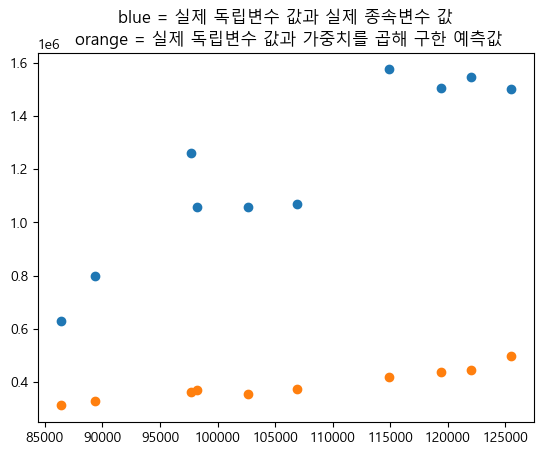

In [27]:
plt.scatter(X.sum(axis=1),Y)
plt.scatter(X.sum(axis=1),Y_hat)
plt.title('blue = 실제 독립변수 값과 실제 종속변수 값\n orange = 실제 독립변수 값과 가중치를 곱해 구한 예측값')

# 이로서 선형회귀모형에서 사용하는

# 실제값 = 예측값 + 에러 
# -> Y = Y_hat + error 
# -> Y = theta * X + error 
# -> [실제 Y값 행렬] = [beta0,beta1,beta2 ... beta4] * [실제 X값 행렬] + [error 행렬] 
# 2차원 평면상에 상관관계를 갖는 종속변수들은 직선 방정식 * 독립변수 값  + error 값으로 표현 가능하다.

# 여기서 X,Y 값들은 이미 값이 정해진 상수, theta 는 미지수이다.
# theta * X 값이 실제 값 Y 에 가까워 질 수록 오차제곱합은 작아질 것이다.

# 오차제곱합이 최소가 되는 theta 값을 찾는 것이 선형회귀모형의 과제 

In [28]:
df = df.drop(columns = 'error')
df

,constant,Avg. Area Income,Avg. Area House Age,Area Population,Avg_room_number,Price
0,1,79545.4585743168,5.6828613216,23086.8005026865,11.0991881428,1059033.5578701235
1,1,79248.6424548257,6.0028998083,40173.0721736448,9.8208210191,1505890.9148469500
2,1,61287.0671786568,5.8658898403,36882.1593997046,13.6427274304,1058987.9878760849
3,1,63345.2400462280,7.1882360945,34310.2428309071,8.8467286648,1260616.8066294468
4,1,59982.1972257080,5.0405545231,26354.1094721031,12.0693877851,630943.4893385402
...,...,...,...,...,...,...
4995,1,60567.9441398660,7.8303624436,22837.3610347464,9.5973562276,1060193.7858846080
4996,1,78491.2754345979,6.9991349873,25616.1154890612,10.5967626607,1482617.7286220239
4997,1,63390.6868855046,7.2505906148,33266.1454896522,6.9350809803,1030729.5831522896
4998,1,68001.3312350870,5.5343884162,42625.6201558509,12.5701438643,1198656.8724076871


In [29]:
X_array = np.array(df.iloc[:,:-1])
X = np.matrix(X_array)
Y = np.array(df.iloc[:,-1]).reshape(-1,1)

In [30]:
print('독립 변수 값 행렬 X는',X.shape)
print('--'*20)
print('종속 변수 값 배열 Y는',Y.shape)

독립 변수 값 행렬 X는 (5000, 5)
----------------------------------------
종속 변수 값 배열 Y는 (5000, 1)


In [31]:
display(df.iloc[:-1]),display(X)
print('독립 변수 값 배열 X의 크기는 :',X.shape)

,constant,Avg. Area Income,Avg. Area House Age,Area Population,Avg_room_number,Price
0,1,79545.4585743168,5.6828613216,23086.8005026865,11.0991881428,1059033.5578701235
1,1,79248.6424548257,6.0028998083,40173.0721736448,9.8208210191,1505890.9148469500
2,1,61287.0671786568,5.8658898403,36882.1593997046,13.6427274304,1058987.9878760849
3,1,63345.2400462280,7.1882360945,34310.2428309071,8.8467286648,1260616.8066294468
4,1,59982.1972257080,5.0405545231,26354.1094721031,12.0693877851,630943.4893385402
...,...,...,...,...,...,...
4994,1,73060.8462259746,5.2936823106,22695.6954803430,10.4722528085,905354.9139602784
4995,1,60567.9441398660,7.8303624436,22837.3610347464,9.5973562276,1060193.7858846080
4996,1,78491.2754345979,6.9991349873,25616.1154890612,10.5967626607,1482617.7286220239
4997,1,63390.6868855046,7.2505906148,33266.1454896522,6.9350809803,1030729.5831522896


matrix([[1.00000000e+00, 7.95454586e+04, 5.68286132e+00, 2.30868005e+04,
         1.10991881e+01],
        [1.00000000e+00, 7.92486425e+04, 6.00289981e+00, 4.01730722e+04,
         9.82082102e+00],
        [1.00000000e+00, 6.12870672e+04, 5.86588984e+00, 3.68821594e+04,
         1.36427274e+01],
        ...,
        [1.00000000e+00, 6.33906869e+04, 7.25059061e+00, 3.32661455e+04,
         6.93508098e+00],
        [1.00000000e+00, 6.80013312e+04, 5.53438842e+00, 4.26256202e+04,
         1.25701439e+01],
        [1.00000000e+00, 6.55105818e+04, 5.99230531e+00, 4.65012838e+04,
         1.08623361e+01]])

독립 변수 값 배열 X의 크기는 : (5000, 5)


In [32]:
display(df[['Price']]),display(Y)
print('종속 변수 Y 값 배열의 크기는',Y.shape)

,Price
0,1059033.5578701235
1,1505890.9148469500
2,1058987.9878760849
3,1260616.8066294468
4,630943.4893385402
...,...
4995,1060193.7858846080
4996,1482617.7286220239
4997,1030729.5831522896
4998,1198656.8724076871


array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

종속 변수 Y 값 배열의 크기는 (5000, 1)


In [33]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [34]:
theta

matrix([[-2.35457427e+06],
        [ 2.13921409e+01],
        [ 1.64620827e+05],
        [ 1.53508932e+01],
        [ 5.29112435e+04]])

# 회귀 모형의 가중치의 값들을 구했으니 실제 값과 비교해보기 

In [35]:
Y_hat = theta.T.dot(X.T).reshape(-1,1) #가중치로 구해진 직선 방정식을 이용한 예측값
Y_hat

matrix([[1224265.58363183],
        [1465250.58850593],
        [1210162.71485308],
        ...,
        [1072695.27324696],
        [1330638.68130078],
        [1321871.54216704]])

In [36]:
Y #실제값 

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [37]:
Y_mean = Y.mean()
Y_mean

1232072.654142357

In [38]:
Y - Y_mean

array([[-173039.09627223],
       [ 273818.26070459],
       [-173084.66626627],
       ...,
       [-201343.07099007],
       [ -33415.78173467],
       [  66877.8261246 ]])

### 오차제곱합 구하기 

In [39]:
SSE = sum(np.power(Y - Y_hat,2))

### 전체 제곱합 구하기 

In [40]:
SST = sum(np.power(Y - Y_mean,2))

# 오차제곱합 / 전체 제곱합 = R^2

In [41]:
R_square = 1 - sum(SSE) / sum(SST)
R_square

matrix([[0.88073929]])

In [42]:
Y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

Text(0.5, 1.0, '다중 선형 회귀 분석 예측값 vs 실제값 \n 실제값 : 빨간색 \n 예측값 : 파란색')

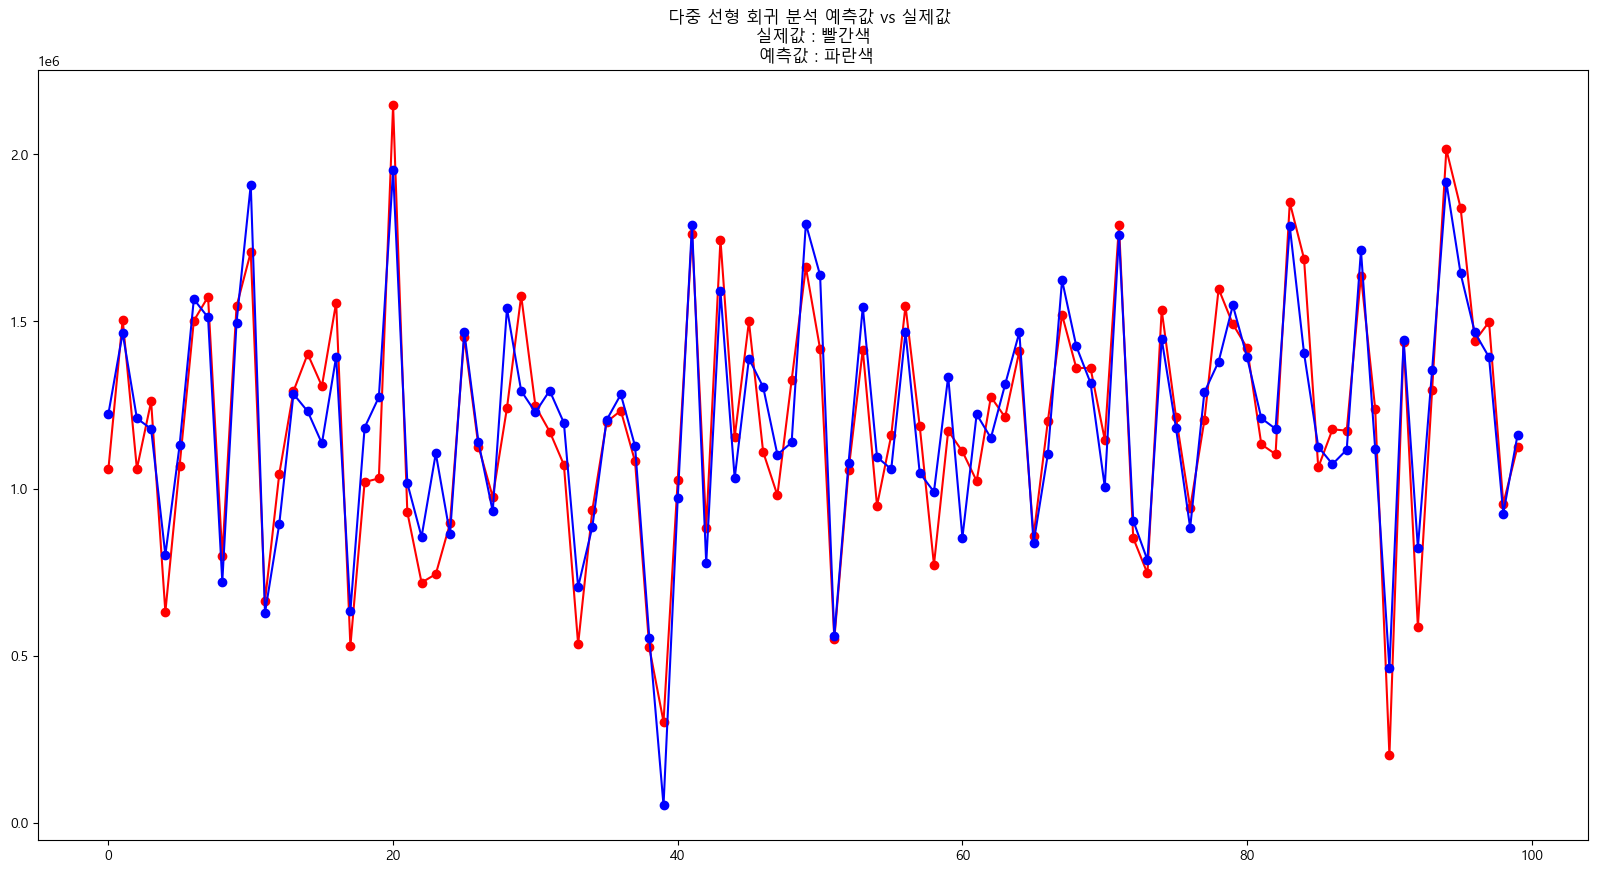

In [43]:
plt.figure(figsize = [20,10])
plt.plot(Y[:100],marker = 'o',c ='r')
plt.plot(Y_hat[:100],marker = 'o', c = 'b')
plt.title('다중 선형 회귀 분석 예측값 vs 실제값 \n 실제값 : 빨간색 \n 예측값 : 파란색')

# 해당 선형 회귀 모형이 통계적으로 유의미한 모형인가를 검정 하기 위해서는 잔차가 정규분포를 따르는가를 봐야함

### 1. 잔차의 등분산성
### 2. 잔차의 정규성 
### 3. 잔차의 독립성

### 잔차의 등분산성 확인 

In [196]:
Y_hat = theta.T.dot(X.T).reshape(-1,1) 
Y_hat = np.array(Y_hat)
residual = np.array(Y - Y_hat)

array([[-165232.0257617 ],
       [  40640.32634102],
       [-151174.726977  ],
       ...,
       [ -41965.69009467],
       [-131981.80889309],
       [ -22921.06190009]])

Text(0, 0.5, '잔차')

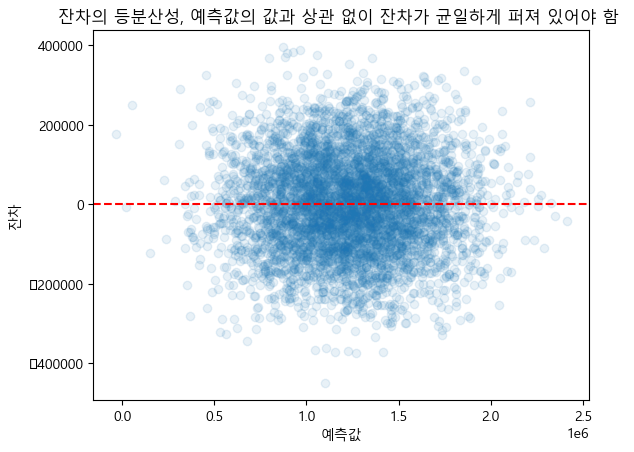

In [72]:
plt.scatter(Y_hat,residual, alpha = 0.1)
plt.axhline(y = 0 , c = 'r', linestyle = '--')
plt.title('잔차의 등분산성, 예측값의 값과 상관 없이 잔차가 균일하게 퍼져 있어야 함 ')
plt.xlabel('예측값')
plt.ylabel('잔차')

### 잔차의 정규성 확인 

### QQ plot 그려보기 

array([-1.3829444 ,  0.32733088,  0.36114511, ..., -1.55028301,
       -0.01420549,  0.12981092])

In [112]:
normal_dist = np.random.normal(loc=0, scale=1, size=5000)
standard_residual = (residual - residual.mean()) / residual.var()**0.5

array([[-1.35509444],
       [ 0.33329786],
       [-1.23980827],
       ...,
       [-0.34416738],
       [-1.08240406],
       [-0.18797932]])

In [139]:
sorted_standard_residual = np.sort(standard_residual,axis=None) #표준화 된 잔차를 작은 숫자부터 큰 숫자까지 정렬
sorted_normal_distribution = np.sort(normal_dist,axis=None) #정규분포 값도 작은 숫자부터 큰 숫자까지 정렬

Text(0, 0.5, '표준화 된 잔차')

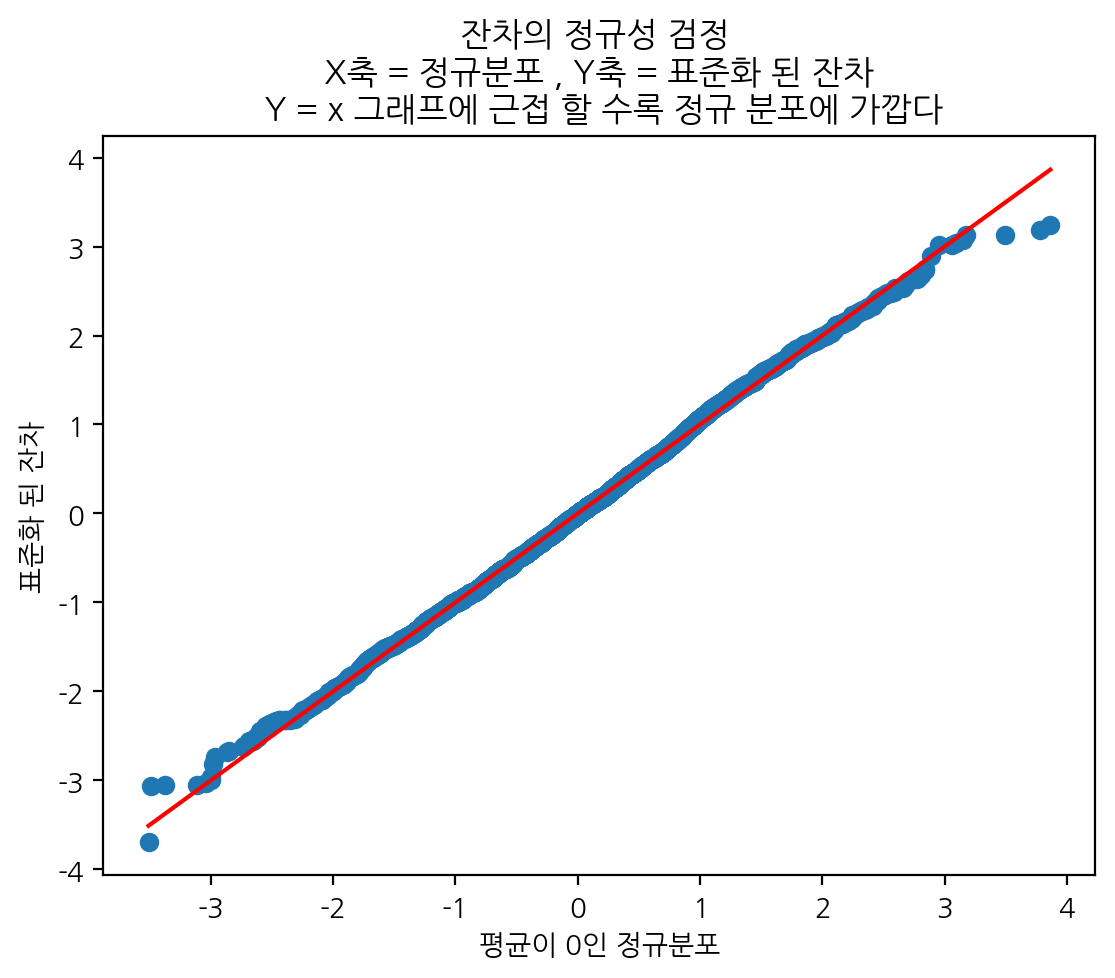

In [199]:
plt.scatter(sorted_normal_distribution,sorted_standard_residual)
plt.plot(sorted_normal_distribution,sorted_normal_distribution, c = 'r')
plt.title('잔차의 정규성 검정 \n X축 = 정규분포 , Y축 = 표준화 된 잔차 \n Y = x 그래프에 근접 할 수록 정규 분포에 가깝다')
plt.xlabel('평균이 0인 정규분포')
plt.ylabel('표준화 된 잔차')

# 확률 밀도 함수를 그려봐서 확인해보자 

Text(0.5, 1.0, '잔차의 확률 밀도 함수')

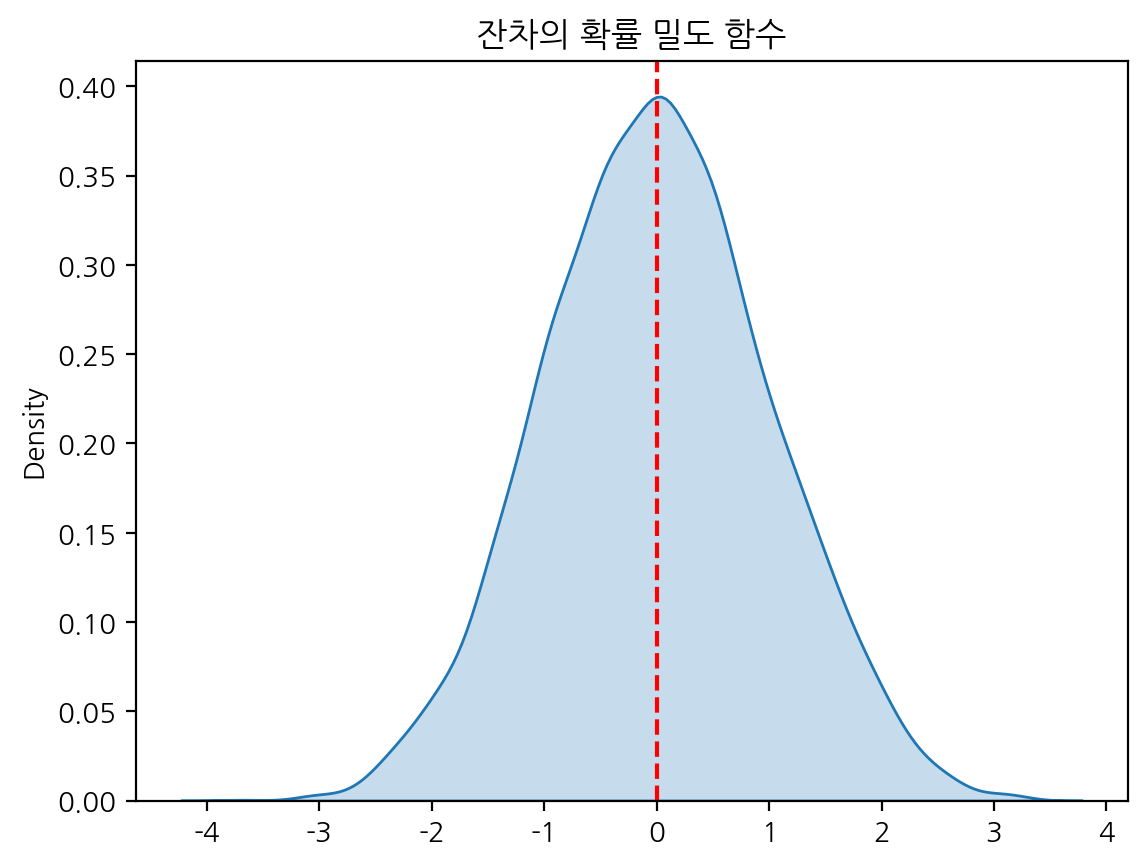

In [161]:
sns.kdeplot(sorted_standard_residual, shade = True)
plt.axvline(x = 0 , c = 'r' , linestyle = '--')
plt.title('잔차의 확률 밀도 함수')

# 잔차의 독립성 검정 

* 잔차들은 서로 독립적인가? 잔차의 값들이 시간이 지날 수록 증가하거나 감소하는 선형적인 형태를 보이지는 않는가?

Text(0.5, 1.0, '잔차의 독립성')

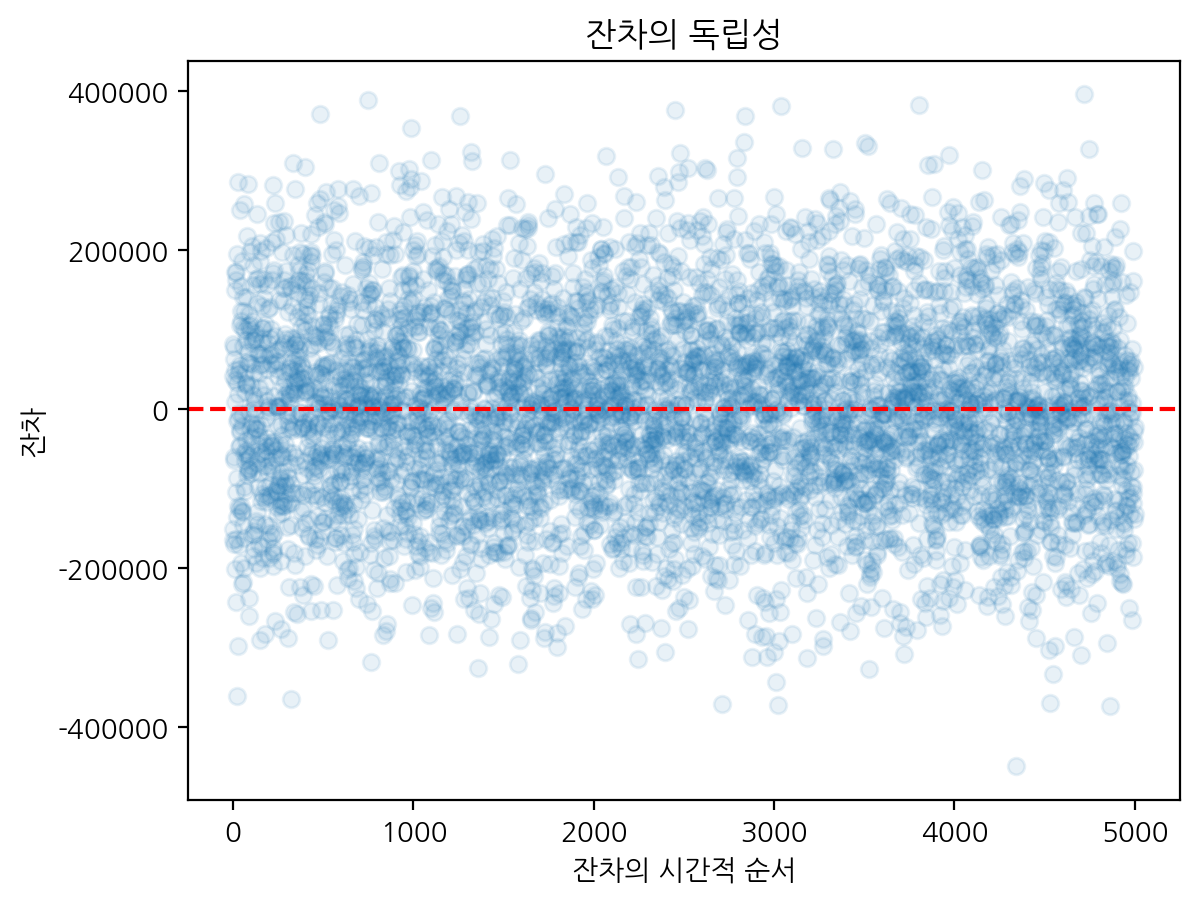

In [195]:
plt.scatter(range(len(residual)),residual,alpha = 0.1)
plt.axhline(y = 0 , c = 'r' , linestyle = '--')
plt.xlabel('잔차의 시간적 순서')
plt.ylabel('잔차')
plt.title('잔차의 독립성')